<a href="https://colab.research.google.com/github/anastasiaarsky/ML_Capstone/blob/main/DataWrangling%26Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import glob
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import numpy as np
import pandas as pd
import re
import string
import time

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
DATA_PATH = "/content/drive/My Drive/UCSD Machine Learning Engineering Bootcamp/Capstone Project/"

In [ ]:
# Load data to CSV
#df = pd.read_csv('Data.csv')
df = pd.read_csv('FullData.csv')

## Text Preprocessing

In [ ]:
# Combine Subject and Message into Full Text
df['Full_Text'] = df["Subject"].map(str) + '. ' + df["Message"].map(str)

In [ ]:
# takes a df column and returns a normalized list of strings
# (each string in the list represents one email/sample)
#
# Normalization process:
# transforms each token to lower case, converts URLs to the string 'URL',
# converts emails to the string 'email', converts numbers to the string 'number',
# and removes extra newlines, whitespace, and stopwords
def normalize_corpus(col):
    norm_corpus = []
    for text in col:
      text = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)', 'URL', text)
      text = re.sub(r'<\S+@\S+>', 'email', text)
      text = re.sub(r'<|>', '', text)
      text = re.sub(r'[0-9]+','number', text)
      text = text.lower()
      text = re.sub(r'[\r|\n|\r\n]+', ' ', text)
      text = re.sub(r' +', ' ', text)
      words = text.split()
      # words = [word.strip(string.punctuation) for word in words]
      text = ' '.join([word for word in words if len(word) > 0 if word not in set(stopwords.words())])
      norm_corpus.append(text)
    return norm_corpus

In [ ]:
# preprocess_data takes an index number and df and returns a cleaned version of
# the df
# also keeps track of the execution time
def preprocess_data(index, group):
  start_time = time.time()
  group['Clean_Text'] = normalize_corpus(group['Full_Text'])
  print("Execution time for Group %d: %.3f s" % (index, time.time() - start_time))
  return group

In [ ]:
# split df into twenty groups
df_split = np.array_split(df, 20)

In [ ]:
# call preprocess_data on group 1
group1 = preprocess_data(1, df_split[0])
group1.to_csv(DATA_PATH + 'Groups/Group1.csv', index=False)

Execution time for Group 1: 2426.695 s


In [ ]:
# call preprocess_data on group 2
group2 = preprocess_data(2, df_split[1])
group2.to_csv(DATA_PATH + 'Groups/Group2.csv', index=False)

Execution time for Group 2: 2401.523 s


In [ ]:
# call preprocess_data on group 3
group3 = preprocess_data(3, df_split[2])
group3.to_csv(DATA_PATH + 'Groups/Group3.csv', index=False)

Execution time for Group 3: 4760.348 s


In [ ]:
# call preprocess_data on group 4
group4 = preprocess_data(4, df_split[3])
group4.to_csv(DATA_PATH + 'Groups/Group4.csv', index=False)

Execution time for Group 4: 2930.854 s


In [ ]:
# call preprocess_data on group 5
group5 = preprocess_data(5, df_split[4])
group5.to_csv(DATA_PATH + 'Groups/Group5.csv', index=False)

Execution time for Group 5: 2388.979 s


In [ ]:
# call preprocess_data on group 6
group6 = preprocess_data(6, df_split[5])
group6.to_csv(DATA_PATH + 'Groups/Group6.csv', index=False)

Execution time for Group 6: 2811.994 s


In [ ]:
# call preprocess_data on group 7
group7 = preprocess_data(7, df_split[6])
group7.to_csv(DATA_PATH + 'Groups/Group7.csv', index=False)

Execution time for Group 7: 3508.696 s


In [ ]:
# call preprocess_data on group 8
group8 = preprocess_data(8, df_split[7])
group8.to_csv(DATA_PATH + 'Groups/Group8.csv', index=False)

Execution time for Group 8: 4071.767 s


In [ ]:
# call preprocess_data on group 9
group9 = preprocess_data(9, df_split[8])
group9.to_csv(DATA_PATH + 'Groups/Group9.csv', index=False)

Execution time for Group 9: 2941.537 s


In [ ]:
# call preprocess_data on group 10
group10 = preprocess_data(10, df_split[9])
group10.to_csv(DATA_PATH + 'Groups/Group10.csv', index=False)

Execution time for Group 10: 6675.010 s


In [ ]:
# call preprocess_data on group 11
group11 = preprocess_data(11, df_split[10])
group11.to_csv(DATA_PATH + 'Groups/Group11.csv', index=False)

Execution time for Group 11: 6342.680 s


In [ ]:
# call preprocess_data on group 12
group12 = preprocess_data(12, df_split[11])
group12.to_csv(DATA_PATH + 'Groups/Group12.csv', index=False)

Execution time for Group 12: 2553.531 s


In [ ]:
# call preprocess_data on group 13
group13 = preprocess_data(13, df_split[12])
group13.to_csv(DATA_PATH + 'Groups/Group13.csv', index=False)

Execution time for Group 13: 2429.122 s


In [ ]:
# call preprocess_data on group 14
group14 = preprocess_data(14, df_split[13])
group14.to_csv(DATA_PATH + 'Groups/Group14.csv', index=False)

Execution time for Group 14: 2503.615 s


In [ ]:
# call preprocess_data on group 15
group15 = preprocess_data(15, df_split[14])
group15.to_csv(DATA_PATH + 'Groups/Group15.csv', index=False)

Execution time for Group 15: 3149.449 s


In [ ]:
# call preprocess_data on group 16
group16 = preprocess_data(16, df_split[15])
group16.to_csv(DATA_PATH + 'Groups/Group16.csv', index=False)

Execution time for Group 16: 3706.524 s


In [ ]:
# call preprocess_data on group 17
group17 = preprocess_data(17, df_split[16])
group17.to_csv(DATA_PATH + 'Groups/Group17.csv', index=False)

Execution time for Group 17: 2249.869 s


In [ ]:
# call preprocess_data on group 18
group18 = preprocess_data(18, df_split[17])
group18.to_csv(DATA_PATH + 'Groups/Group18.csv', index=False)

Execution time for Group 18: 3230.181 s


In [ ]:
# call preprocess_data on group 19
group19 = preprocess_data(19, df_split[18])
group19.to_csv(DATA_PATH + 'Groups/Group19.csv', index=False)

Execution time for Group 19: 2691.911 s


In [ ]:
# call preprocess_data on group 20
group20 = preprocess_data(20, df_split[19])
group20.to_csv(DATA_PATH + 'Groups/Group20.csv', index=False)

Execution time for Group 20: 3174.686 s


In [38]:
# concatenate all the groups into clean_df

# Get CSV files list from Groups folder
path = '/content/drive/My Drive/UCSD Machine Learning Engineering Bootcamp/Capstone Project/Groups'
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame, creating a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
clean_df = pd.concat(df_list, ignore_index=True)
clean_df = clean_df[['Label', 'Clean_Text', 'Full_Text']]

In [39]:
 # Show a sample email
clean_df.iloc[4][['Full_Text', 'Clean_Text']].to_dict()

{'Full_Text': '[WM] The MIME information you requested (last changed 3154 Feb 14). --------------------------------------------------------------------------\n\nWhat is MIME?\n\nMIME stands for "Multipurpose Internet Mail Extensions".  It is the\nstandard for how to send multipart, multimedia, and binary data using the\nworld-wide Internet email system.  Typical uses of MIME include sending\nimages, audio, wordprocessing documents, programs, or even plain text\nfiles when it is important that the mail system does not modify any part\nof the file.  MIME also allows for labelling message parts so that a\nrecipient (or mail program) may determine what to do with them. \n\nHow can I read a MIME message?\n\nSince MIME is only a few years old, there are still some mailers in use\nwhich do not understand MIME messages.  However, there are a growing\nnumber of mail programs that have MIME support built-in.  (One popular\nMIME-capable mailer for Unix, VMS and PCs is Pine, developed at the\nUniv

In [40]:
# One additional step
import unicodedata

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return "".join(new_words)

clean_df['Clean_Text'] = clean_df.apply(lambda row: remove_non_ascii(row['Clean_Text']), axis=1)

In [41]:
clean_df = clean_df[['Label', 'Clean_Text']]
clean_df.head()

,Label,Clean_Text
0,0.0,re: liberal defnitions. message dated number/n...
1,0.0,"re: ximian apt repos?. sun, number jul number ..."
2,0.0,"problems apt update. hiya, errors ""apt update""..."
3,0.0,re: developer libraries problem m$ software?. ...
4,0.0,[wm] mime information requested (last changed ...


In [42]:
# Check number of missing values
clean_df.isna().sum()

Label         0
Clean_Text    0
dtype: int64

In [43]:
# Save to CSV
clean_df.to_csv(DATA_PATH + 'CleanData.csv', index=False)

## Data Exploration

In [50]:
clean_df = pd.read_csv(DATA_PATH + 'CleanData.csv', encoding = "utf-8")

In [51]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39763 entries, 0 to 39762
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Label       39763 non-null  float64
 1   Clean_Text  39763 non-null  object 
dtypes: float64(1), object(1)
memory usage: 621.4+ KB


### Label Insights

<Axes: ylabel='Label'>

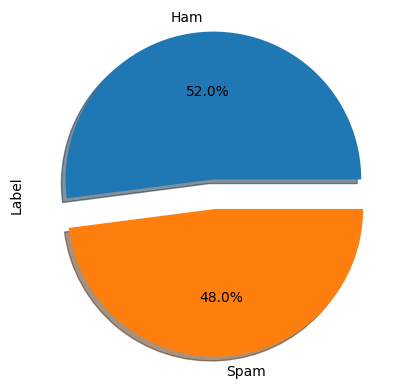

In [52]:
# Check for balanced data
clean_df.Label.value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=[0.1,0.1], labels=['Ham', 'Spam'])

### Text Insights

In [53]:
# Quick summary
clean_df['Clean_Text'].describe()

count                                                 39763
unique                                                34968
top       start date : number / number / number ; hourah...
freq                                                    449
Name: Clean_Text, dtype: object

In [54]:
from collections import Counter
Counter(" ".join(clean_df["Clean_Text"]).split()).most_common(50)

[('number', 534561),
 ('.', 522745),
 ('-', 414196),
 (',', 384536),
 ('/', 174582),
 (':', 169122),
 ("'", 79758),
 ('_', 69203),
 ('enron', 60828),
 (')', 56281),
 ('(', 52978),
 ('"', 49537),
 ('@', 47590),
 ('?', 44179),
 ('$', 42794),
 ('!', 41046),
 ('ect', 35351),
 (';', 28363),
 ('*', 25652),
 ('company', 23635),
 ('=', 21885),
 ('hou', 17264),
 ('email', 15076),
 ('%', 14638),
 ('subject', 14631),
 ('&', 14469),
 ('information', 14268),
 ('time', 14123),
 ('business', 13524),
 ('url', 13294),
 ('gas', 11913),
 ('td', 11621),
 ('energy', 11552),
 ('http', 11158),
 ('p', 10975),
 ('message', 10823),
 ('pm', 9938),
 ('mail', 9923),
 ('price', 9788),
 ('cc', 9388),
 ('make', 9073),
 ('power', 8993),
 ('market', 8748),
 ('vince', 8651),
 ('free', 8649),
 ('#', 8536),
 ('+', 8411),
 ('src="url"', 8283),
 ('money', 8140),
 ('list', 8133)]

In [74]:
# WordCloud Code
from wordcloud import WordCloud, ImageColorGenerator
from matplotlib import pyplot as plt
import string

def wordcloud(df):
    words = " ".join(df["Clean_Text"])
    cleaned_word = " ".join([word for word in words.split()
                            if 'number' not in word])
    #print(cleaned_word)
    wc = WordCloud(collocations=False, max_words=2000, max_font_size= 300,  width=1600, height=800)
    wc.generate(cleaned_word)

    plt.figure(1,figsize=(12, 12))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

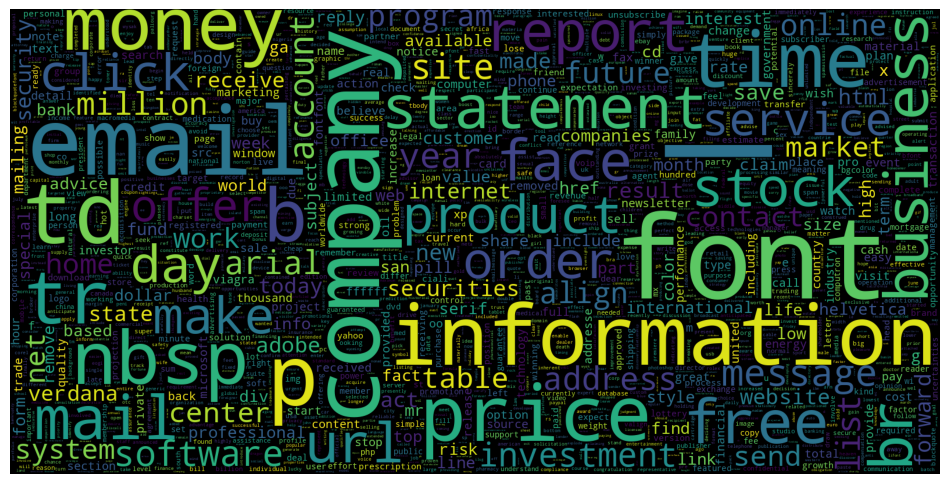

In [75]:
# WordCloud of Spam emails
spam = clean_df[clean_df['Label'] == 1]
wordcloud(spam)

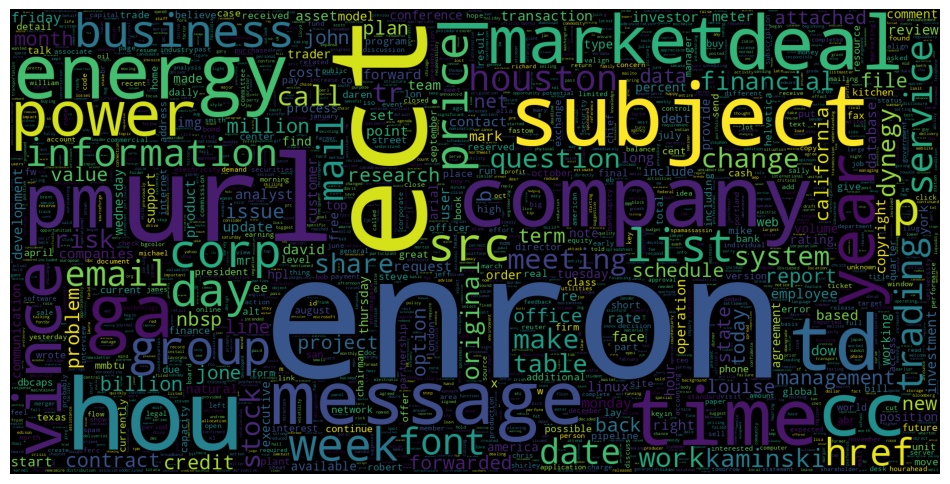

In [76]:
# WordCloud of Ham emails
ham = clean_df[clean_df['Label'] == 0]
wordcloud(ham)

<Axes: ylabel='Frequency'>

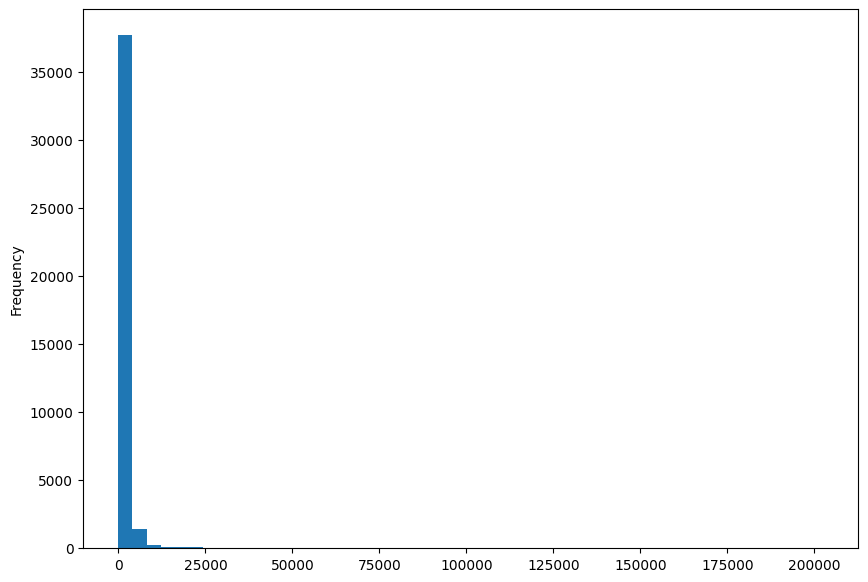

In [35]:
# Graph of email word length
clean_df['Length'] = clean_df['Clean_Text'].apply(len)
clean_df['Length'].plot(bins=50, kind='hist',figsize=(10,7))

array([<Axes: title={'center': '0.0'}>, <Axes: title={'center': '1.0'}>],
      dtype=object)

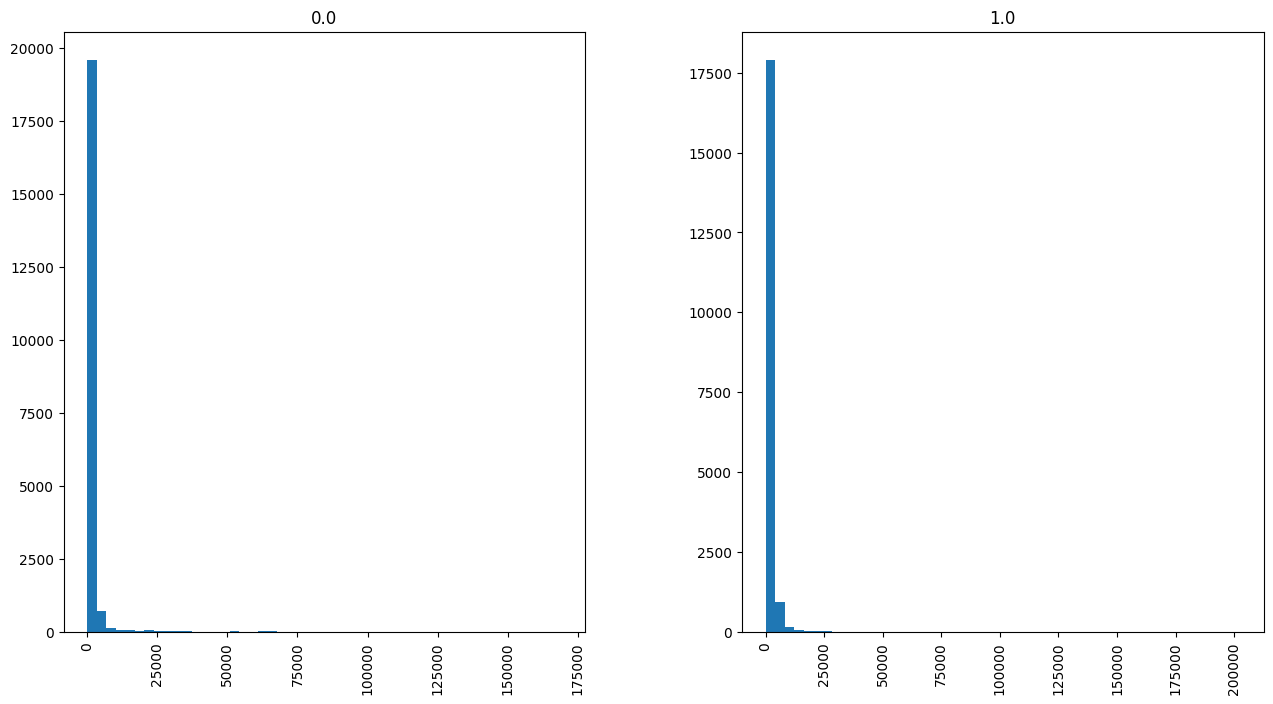

In [36]:
clean_df.hist(column='Length', by='Label', bins=50, figsize=(15,8))